In [4]:
import pickle
import pandas as pd
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)
pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,x4_413,x4_414,x4_415,x4_416,x4_417,x4_418,x4_419,x4_420,x4_421,x4_422
0,-1.508366,1.658110,0.832457,-1.530204,0.832508,-1.310525,-0.972401,-1.311142,-1.616872,0.193381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.432612,-0.592293,0.808653,-0.097455,0.808811,0.379882,0.040214,0.379595,0.056732,0.913424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.264149,-0.592293,-0.061110,0.544812,-0.061490,1.648178,0.749044,1.647648,-1.006287,1.119150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.264149,-0.592293,-0.617759,-0.393886,-0.617276,0.322946,0.698414,0.321851,-1.084361,1.170582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.581918,-0.592293,-0.181961,0.396596,-0.182125,-0.444707,-0.466094,-0.444986,0.825468,-0.938114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,-0.363687,-0.592293,-1.753029,-0.196265,-1.752545,0.389698,-1.883755,0.388834,2.975528,-1.298135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2329,0.407728,-0.592293,1.110782,-0.789127,1.110401,-0.519313,0.293368,-0.518898,0.168839,-0.372367,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2330,0.606802,-0.592293,-0.771569,-0.295075,-0.771302,0.167845,-0.871140,0.167098,0.747393,0.707697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2331,-0.911142,1.367735,0.403984,0.050760,0.403820,-1.127938,-0.567355,-1.128672,-1.018298,1.376308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
gbc = GradientBoostingClassifier()

In [10]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[1995    0]
 [  36  302]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.89      0.94       338

    accuracy                           0.98      2333
   macro avg       0.99      0.95      0.97      2333
weighted avg       0.98      0.98      0.98      2333



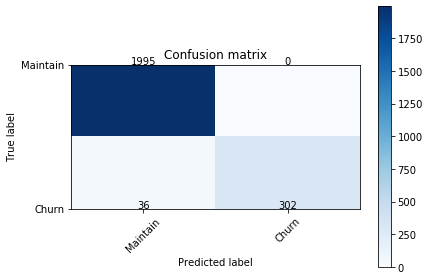

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

y_pred = gbc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))

In [13]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(gbc, X_train, y_train, cv=5, scoring= 'precision')
np.average(scores1)

0.9833823252308271

In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [15]:
y_pred = gbc.predict(X_train)
print ('accuracy score:', gbc.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy score: 0.9845692241748821
recall: 0.893491124260355
precision: 1.0
f1: 0.9437500000000001


In [16]:
# from tqdm import tqdm_notebook as tqdm
# import matplotlib.pyplot as plt 
# %matplotlib inline
# # choose k between 1 to 20
# k_range = range(1, 100)
# k_scores = []

# for k in tqdm(k_range):
#     cgb = GradientBoostingClassifier(n_estimators=k)
#     scores = cross_val_score(cgb, X_train, y_train, cv=5, scoring='precision')
#     k_scores.append(scores.mean())

# plt.plot(k_range, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Precision')
# plt.show()

In [17]:
from tqdm import tqdm_notebook as tqdm

In [24]:
from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

from sklearn.pipeline import Pipeline

In [25]:
fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 5.0  # Hz
low_fq_width = 1.0  # Hz

n_epochs = 3
n_points = 10000
noise_level = 0.4

low_sig = np.array([
    simulate_pac(n_points=n_points, fs=fs, high_fq=high_fq, low_fq=low_fq,
                 low_fq_width=low_fq_width, noise_level=noise_level,
                 random_state=i) for i in range(n_epochs)
])

In [26]:
model = Pipeline(steps=[
    ('driver', ExtractDriver(fs=fs, low_fq=4., max_low_fq=7.,
                             low_fq_width=low_fq_width, random_state=0)),
    ('add', AddDriverDelay()),
    ('dar', DARSklearn(fs=fs, max_ordar=100)),
])

# grid of parameter on which we will loop
param_grid = {
    'dar__ordar': np.arange(0, 110, 30),
    'dar__ordriv': [0, 1, 2],
    'add__delay': [0],
    'driver__low_fq': [3., 4., 5., 6., 7.],
    'driver__low_fq_width': [0.25, 0.5, 1.],
}

In [18]:
from sklearn.model_selection import GridSearchCV
# (GridSearchCVProgressBar is identical to GridSearchCV, but it adds a nice
# progress bar to monitor progress.)
gscv = GridSearchCVProgressBar(model, param_grid=param_grid,
                               return_train_score=False, verbose=1)

# Fit the grid-search. We use `MultipleArray` to put together low_sig and
# high_sig. If high_sig is None, we use low_sig for both the driver and the
# modeled signal.
X = MultipleArray(low_sig, None)
gscv.fit(X)

In [31]:
gbc2 = GradientBoostingClassifier()

n_estimator = range(2, 200, 10)

max_depth_params = range(1,10)
max_features_param = [None, 'auto', 'sqrt', 'log2', 25]

param_grid = {'n_estimators': n_estimator, 'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = (GridSearchCV(estimator = gbc2, 
                          param_grid = param_grid,
                          n_jobs = -1, #parallel computation
                          verbose = 1, #give feedback
                          cv = 10, #cross-validate 10 times
                          scoring = 'precision', #can use multiple scoring  , recall, precision..ect
                          return_train_score= True))
# X = MultipleArray(low_sig, None)
# gridsearch.fit(X)
gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1561 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3263 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4013 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4863 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5813 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6863 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 8013 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 16.1min finished


In [32]:
gridsearch.best_score_

1.0

In [33]:
gridsearch.cv_results_;

In [38]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

results = pd.DataFrame(gridsearch.cv_results_)[colums]
df = results.sort_values(by = 'rank_test_score').head(10)

868    {'max_depth': 9, 'max_features': 'log2', 'n_es...
743    {'max_depth': 8, 'max_features': 'sqrt', 'n_es...
857    {'max_depth': 9, 'max_features': 'sqrt', 'n_es...
856    {'max_depth': 9, 'max_features': 'sqrt', 'n_es...
870    {'max_depth': 9, 'max_features': 'log2', 'n_es...
853    {'max_depth': 9, 'max_features': 'sqrt', 'n_es...
651    {'max_depth': 7, 'max_features': 'sqrt', 'n_es...
104    {'max_depth': 2, 'max_features': None, 'n_esti...
773    {'max_depth': 8, 'max_features': 'log2', 'n_es...
482    {'max_depth': 5, 'max_features': 25, 'n_estima...
Name: params, dtype: object

In [40]:
pd.options.display.max_colwidth = 100
df

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
868,"{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 82}",1.0,0.0,1,1.0,0.0
743,"{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 32}",1.0,0.0,1,1.0,0.0
857,"{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 172}",1.0,0.0,1,1.0,0.0
856,"{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 162}",1.0,0.0,1,1.0,0.0
870,"{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 102}",1.0,0.0,1,1.0,0.0
853,"{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 132}",1.0,0.0,1,1.0,0.0
651,"{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 112}",1.0,0.0,1,1.0,0.0
104,"{'max_depth': 2, 'max_features': None, 'n_estimators': 42}",1.0,0.0,1,1.0,0.0
773,"{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 132}",1.0,0.0,1,1.0,0.0
482,"{'max_depth': 5, 'max_features': 25, 'n_estimators': 22}",1.0,0.0,1,1.0,0.0


In [36]:
results.shape

(900, 6)

In [42]:
gbc2 = GradientBoostingClassifier(n_estimators=82, max_depth = 9, max_features = 'log2' )

In [43]:
gbc2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=82,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
y_pred2 = gbc2.predict(X_train)
print ('accuracy score:', gbc2.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred2))
print ('precision:', precision_score(y_train, y_pred2))
print ('f1:', f1_score(y_train, y_pred2))

accuracy score: 0.9982854693527646
recall: 0.9881656804733728
precision: 1.0
f1: 0.9940476190476192


Confusion Matrix, without normalization
[[1995    0]
 [   4  334]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.89      0.94       338

    accuracy                           0.98      2333
   macro avg       0.99      0.95      0.97      2333
weighted avg       0.98      0.98      0.98      2333



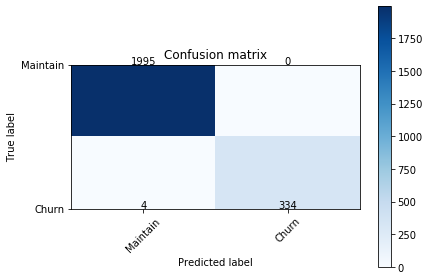

In [45]:
y_pred2 = gbc2.predict(X_train)
cm = confusion_matrix(y_train, y_pred2)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))

In [46]:
scores2 = cross_val_score(gbc2, X_train, y_train, cv=5, scoring= 'precision')
np.average(scores2)

0.9904545454545456